In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Train.csv')

In [4]:
train.head(10)

Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15        9.300  ...  Supermarket Type1          3735.1380
1           DRC01        5.920  ...  Supermarket Type2           443.4228
2           FDN15       17.500  ...  Supermarket Type1          2097.2700
3           FDX07       19.200  ...      Grocery Store           732.3800
4           NCD19        8.930  ...  Supermarket Type1           994.7052
5           FDP36       10.395  ...  Supermarket Type2           556.6088
6           FDO10       13.650  ...  Supermarket Type1           343.5528
7           FDP10          NaN  ...  Supermarket Type3          4022.7636
8           FDH17       16.200  ...  Supermarket Type1          1076.5986
9           FDU28       19.200  ...  Supermarket Type1          4710.5350

[10 rows x 12 columns]

In [5]:
print(train.shape)

(8523, 12)


In [6]:
train.describe()

Item_Weight  ...  Item_Outlet_Sales
count  7060.000000  ...        8523.000000
mean     12.857645  ...        2181.288914
std       4.643456  ...        1706.499616
min       4.555000  ...          33.290000
25%       8.773750  ...         834.247400
50%      12.600000  ...        1794.331000
75%      16.850000  ...        3101.296400
max      21.350000  ...       13086.964800

[8 rows x 5 columns]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [11]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [13]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [14]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [16]:
corr = numeric_features.corr()
corr

Item_Weight  ...  Item_Outlet_Sales
Item_Weight                   1.000000  ...           0.014123
Item_Visibility              -0.014048  ...          -0.128625
Item_MRP                      0.027141  ...           0.567574
Outlet_Establishment_Year    -0.011588  ...          -0.049135
Item_Outlet_Sales             0.014123  ...           1.000000

[5 rows x 5 columns]

In [17]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


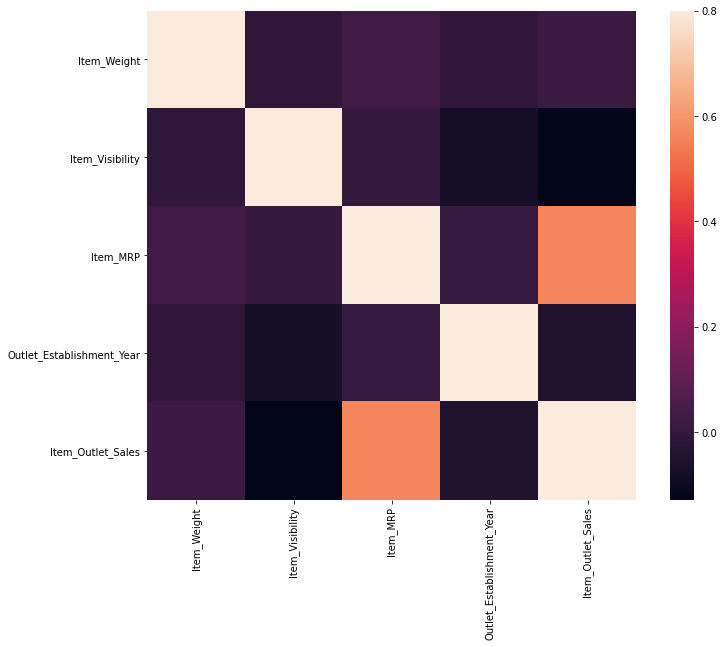

In [18]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.8, square=True)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

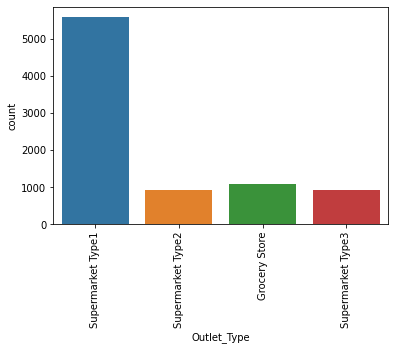

In [19]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

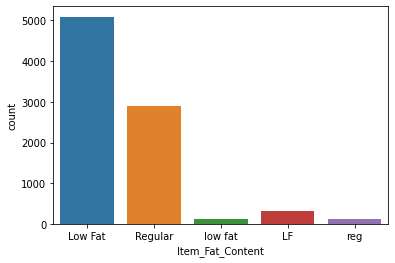

In [20]:
sns.countplot(train.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

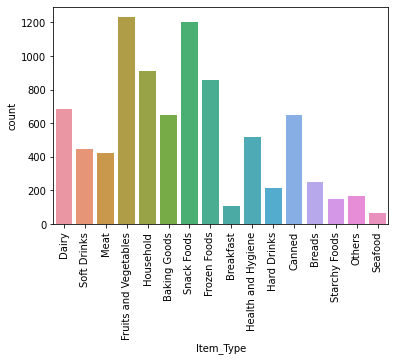

In [21]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

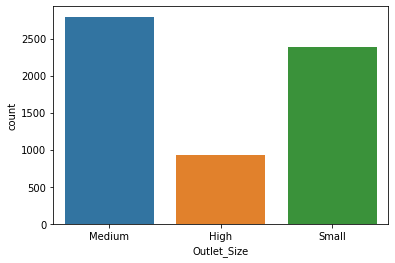

In [22]:
sns.countplot(train.Outlet_Size)

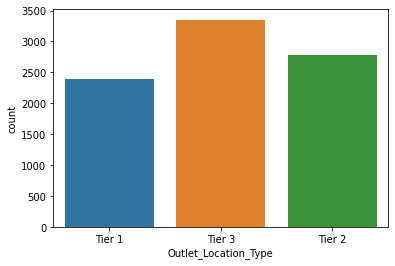

In [23]:
sns.countplot(train.Outlet_Location_Type)

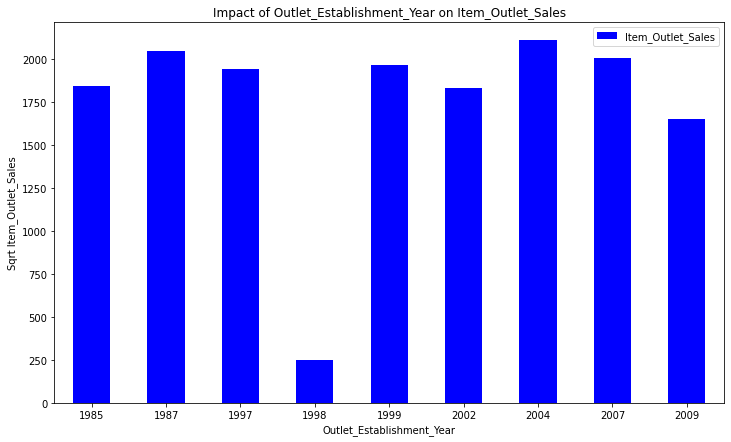

In [24]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar',color='blue', figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

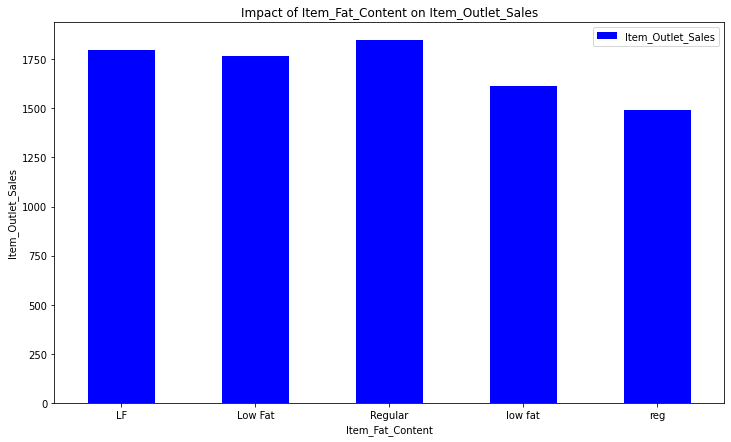

In [25]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar',color='blue', figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

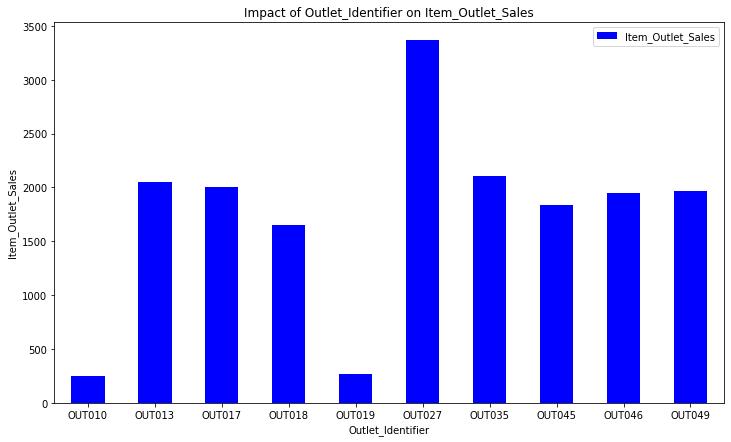

In [26]:
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar',color='blue', figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [27]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier', aggfunc=lambda x:x.mode())

Outlet_Identifier         OUT010  ...             OUT049
Outlet_Type        Grocery Store  ...  Supermarket Type1

[1 rows x 10 columns]

In [28]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size', aggfunc=lambda x:x.mode())

Outlet_Size               High             Medium              Small
Outlet_Type  Supermarket Type1  Supermarket Type3  Supermarket Type1

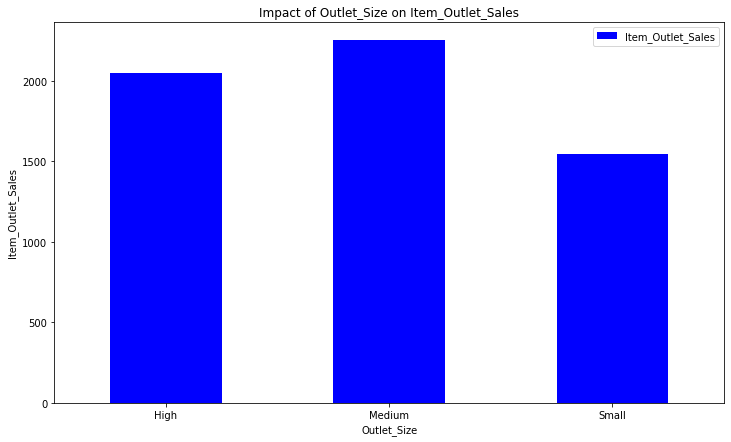

In [29]:
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar',color='blue', figsize=(12,7))
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

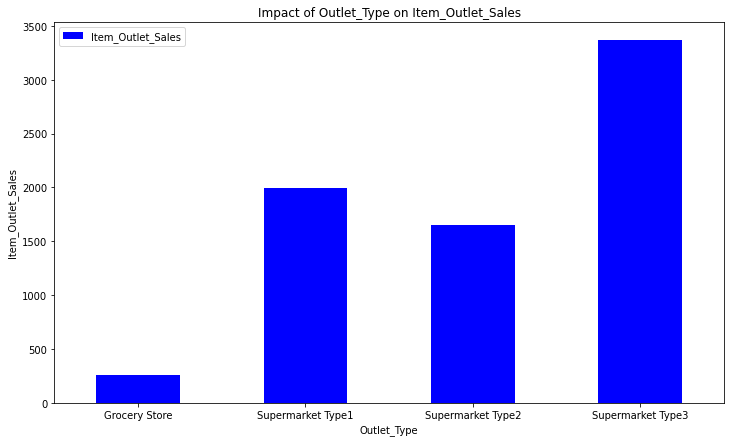

In [30]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar',color='blue', figsize=(12,7))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

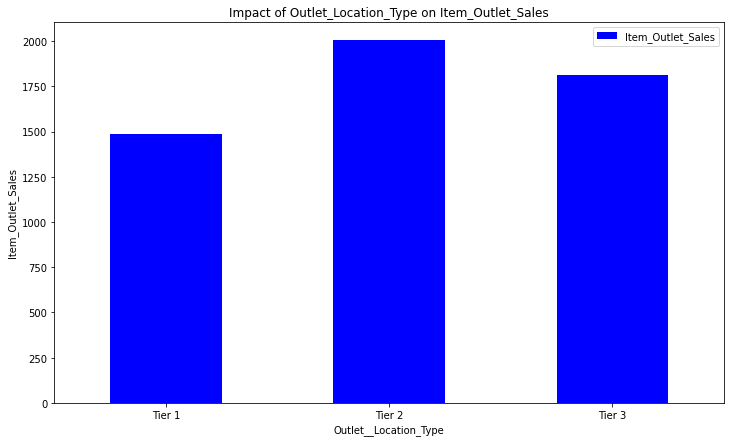

In [31]:
Outlet_Location_Type_pivot = \
train.pivot_table(index='Outlet_Location_Type', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar',color='blue', figsize=(12,7))
plt.xlabel("Outlet__Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [32]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type', aggfunc=lambda x:x.mode())

Outlet_Type          Grocery Store  ... Supermarket Type3
Outlet_Location_Type        Tier 3  ...            Tier 3

[1 rows x 4 columns]

In [33]:
import pandas as pd
df = pd.read_csv('Train.csv')
df.head()

Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30  ...  Supermarket Type1          3735.1380
1           DRC01         5.92  ...  Supermarket Type2           443.4228
2           FDN15        17.50  ...  Supermarket Type1          2097.2700
3           FDX07        19.20  ...      Grocery Store           732.3800
4           NCD19         8.93  ...  Supermarket Type1           994.7052

[5 rows x 12 columns]

In [34]:
len(df.columns)

12

In [35]:
df.describe()

Item_Weight  ...  Item_Outlet_Sales
count  7060.000000  ...        8523.000000
mean     12.857645  ...        2181.288914
std       4.643456  ...        1706.499616
min       4.555000  ...          33.290000
25%       8.773750  ...         834.247400
50%      12.600000  ...        1794.331000
75%      16.850000  ...        3101.296400
max      21.350000  ...       13086.964800

[8 rows x 5 columns]

In [36]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [0]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [0]:
import numpy as np

In [39]:
np.unique(df['Item_Fat_Content'])

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

In [40]:
df.count()

Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler as S, LabelEncoder as L
le = L()
sc = S()

In [42]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [43]:
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [0]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [0]:
df.dropna(inplace=True)

In [46]:
df.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [47]:
df['Item_Weight'] = sc.fit_transform(df['Item_Weight'].values.reshape(-1,1))
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'].values.reshape(-1,1))
df['Item_Type'] = le.fit_transform(df['Item_Type'].values.reshape(-1,1))
df['Item_MRP'] = sc.fit_transform(df['Item_MRP'].values.reshape(-1,1))
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'].values.reshape(-1,1))
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'].values.reshape(-1,1))
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'].values.reshape(-1,1))
df['Outlet_Establishment_Year'] = le.fit_transform(df['Outlet_Establishment_Year'].values.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y = df[df.columns[-1]]
df.drop([df.columns[-1]],axis=1,inplace=True)
x = df

In [49]:
x.describe()
x['Outlet_Establishment_Year'].head()

0    3
1    5
2    3
4    1
5    5
Name: Outlet_Establishment_Year, dtype: int64

In [50]:
print(x.columns)
y.describe()

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


count     6113.000000
mean      2322.688445
std       1741.592093
min         33.955800
25%        974.731200
50%       1928.156800
75%       3271.075400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
from sklearn.linear_model import LinearRegression as lr

In [0]:
xtr,xte,ytr,yte = tts(x,y,test_size=0.2)

In [0]:
reg = lr().fit(xtr,ytr)

In [55]:
reg.score(xte,yte)

0.47442148215709834

In [0]:
from sklearn.neighbors import KNeighborsRegressor as kr

In [0]:
knr = kr().fit(xtr,ytr)

In [58]:
print(knr.score(xte,yte)*100)

46.336696707419435


In [0]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate =0.1,
                          n_estimators=41,
                          max_depth=3,
                          min_child_weight=5,
                          gamma=0,
                          subsample=0.75,
                          colsample_bytree=0.95,
                          nthread=4,
                          scale_pos_weight=1,
                          reg_alpha=0.021,
                          seed=42).fit(xtr,ytr)

In [60]:
xg_reg.score(xte,yte)*100

56.133366250526585

In [0]:
import pickle

In [0]:
of = open('xgboost.pickle','wb+')
pickle.dump(xg_reg,of)
of.close()